# Import Libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import scipy.stats as stats

# Import the file

In [44]:
data=pd.read_csv('Case+Study+Hotel+Tariff+Comparison.csv')

# EDA Basics

In [45]:
data.head()

,hotel,mpdrev,bpdrev
0,1,3685.879567,4071.758975
1,2,3637.186616,3756.839042
2,3,3525.172562,3912.271186
3,4,3460.323749,4163.903728
4,5,3392.520371,4507.828300


In [46]:
data.shape

(100, 3)

In [47]:
data.isnull().sum()

hotel      0
mpdrev     0
bpdrev    70
dtype: int64

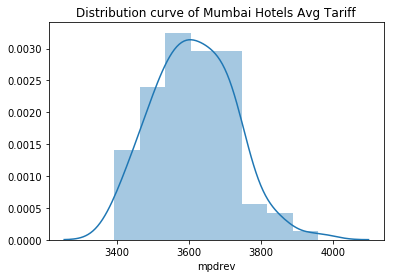

In [48]:
sns.distplot(data.mpdrev)
plt.title('Distribution curve of Mumbai Hotels Avg Tariff')
plt.show()

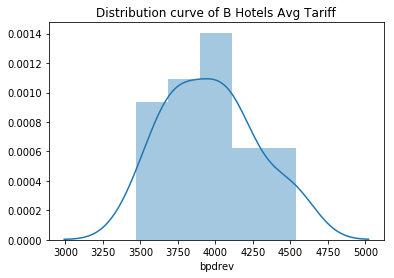

In [49]:
sns.distplot(data.bpdrev.dropna())
plt.title('Distribution curve of B Hotels Avg Tariff')
plt.show()

In [50]:
mum= np.array(data.mpdrev)
ban= np.array(data.bpdrev.dropna())


In [51]:
dfmum= pd.DataFrame({'City':'Mumbai', 'Average Tariff':data.mpdrev})
dfban= pd.DataFrame({'City':'Banglore', 'Average Tariff':data.bpdrev})
df= pd.concat([dfmum,dfban],axis=0)

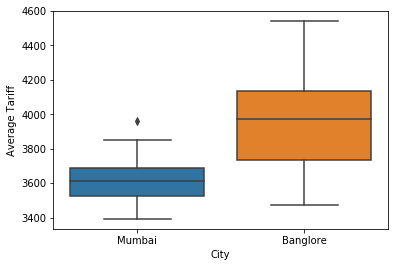

In [53]:
sns.boxplot(x='City', y='Average Tariff', data=df)
plt.show()

### Step 1: Define null and alternative hypotheses

In testing wheather hotels in Mumbai is more expensive than Banglore, the null hypothsis states that mean price, $\mu{M}$ equals or less than $\mu{B}$. The alternative hypthesis states that the mean price of mumbai is greater than banglore, $\mu{M}$ > $\mu{B}$

* $H_0$: $\mu{M}$ - $\mu{B}$ <=      0
* $H_A$: $\mu{M}$ - $\mu{B}$ >  0

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 and it is given that n1, sample size = 100 and n2, sample size =30 and population standard deviation is not known.

### Step 3: Identify the test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are not same.
* The sample is not a large sample. So we use the t distribution and the $t_STAT$ test statistic for two sample unpaired test.

### Step 4: Calculate the p - value and test statistic

In [63]:
t_statistic, p_value =stats.ttest_ind(mum,ban)
print('The p value for two tailed test for the given sitation is %1.20f'%p_value)

The p value for two tailed test for the given sitation is 0.00000000000000002952


and since according to the documentation this is the output for a two-tailed t-test we must divide the p by 2 for our one-tailed test. So depending on the Significance Level alpha you have chosen you need

In [64]:
(p_value/2) < 0.05

True

#### Alternatively, we can also calculate t stats by following method

In [66]:
mumstd= np.std(mum)
banstd= np.std(ban)
mummean= np.mean(mum)
banmean= np.mean(ban)
nmum= len(mum)
nban= len(ban)

In [68]:
sigma= np.sqrt((np.square(mumstd)/nmum)+ (np.square(banstd)/nban))
sigma

55.47970048455921

In [69]:
tstat = (mummean-banmean)/sigma
tstat

-6.394350421473531

In [71]:
tcritical= stats.t.isf(0.05,nmum+nban-2)
print('The critical value for t is : %1.4f' %tcritical )

The critical value for t is : 1.9787


In [73]:
tstat < tcritical

True

### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is very small and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

Also, the t stats value is way less than t critical value

### So there is no sufficient evidence  to hotels in Mumbai is of higher rate than that of Banglore

The End